In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('seaborn-whitegrid')

In [2]:
data = yf.download('GC=F', period='10y', interval='1d', auto_adjust=True)
data = data.resample('M').last()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2012-02-29,1789.900024,1790.400024,1669.000000,1709.900024,359
2012-03-31,1660.599976,1670.000000,1659.000000,1669.300049,9825
2012-04-30,1663.000000,1665.699951,1653.000000,1663.400024,36
2012-05-31,1562.699951,1572.599976,1551.800049,1562.599976,5901
2012-06-30,1562.599976,1603.500000,1561.900024,1603.500000,61


In [3]:
window = 12
data['rolling_mean'] = data.Close.rolling(window).mean()
data['rolling_std'] = data.Close.rolling(window).std()

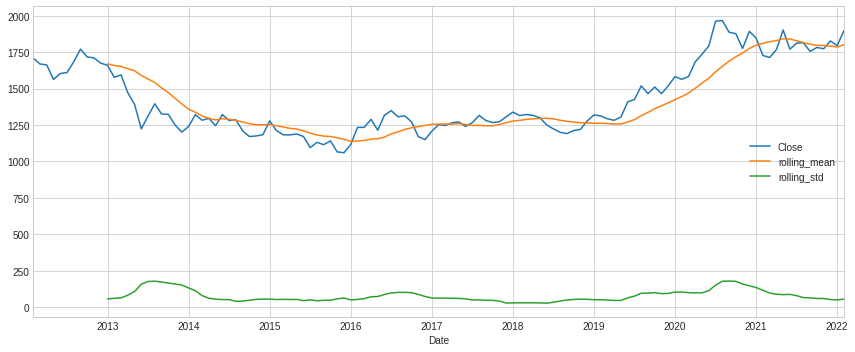

In [4]:
data[['Close', 'rolling_mean', 'rolling_std']].plot()
plt.tight_layout()
plt.show()

In [5]:
decomp = seasonal_decompose(data.Close, model='multiplicative')

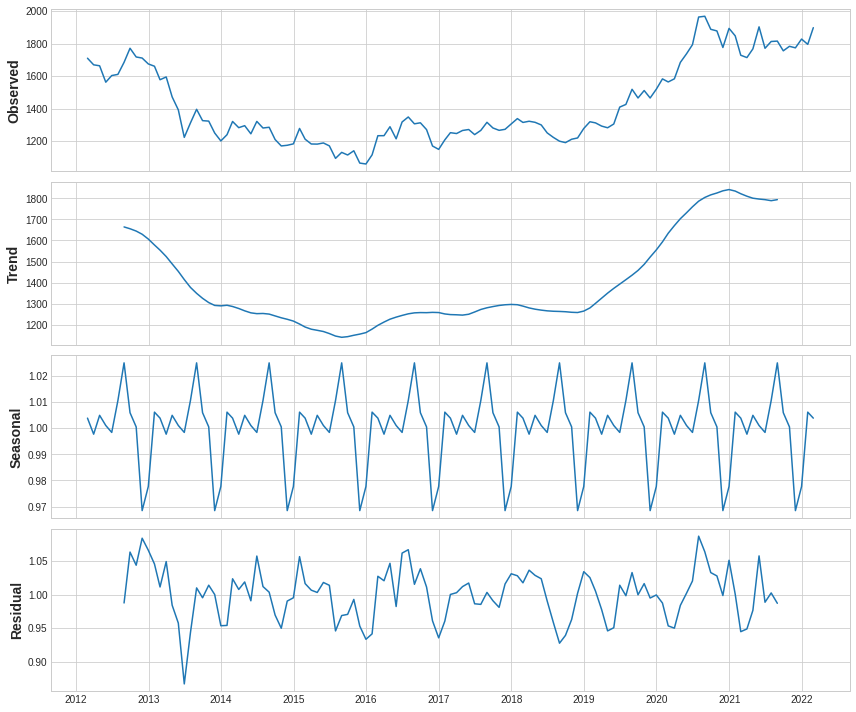

In [6]:
fig, ax = plt.subplots(4, 1 ,figsize=(12,10), sharex=True)
fontdict = {'size':14, 'weight':'bold'}

ax[0].plot(decomp.observed)
ax[0].set_ylabel('Observed', fontdict=fontdict)

ax[1].plot(decomp.trend)
ax[1].set_ylabel('Trend', fontdict=fontdict)

ax[2].plot(decomp.seasonal)
ax[2].set_ylabel('Seasonal', fontdict=fontdict)

ax[3].plot(decomp.resid)
ax[3].set_ylabel('Residual', fontdict=fontdict)

plt.tight_layout()
plt.show()